<IPython.core.display.Javascript object>


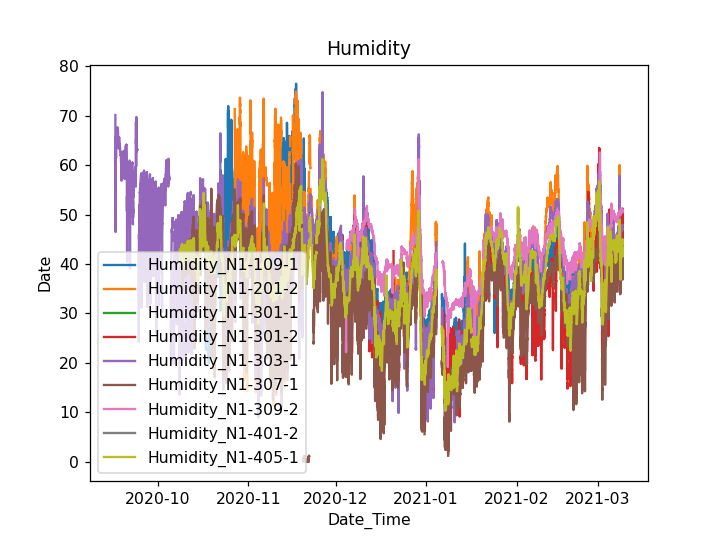

In [36]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib notebook

path = "E:\\01 Files\\课程学习\\04 Python\\N6-506 Python学习\\tcpdata303\\CsvFile"
files = os.listdir(path)
pdFile = pd.read_csv(path + "\\"  + files[0])#取出第一个csv文件若干列放入result
pdFile = pdFile.fillna(0)
header = pdFile.columns.tolist()
Date = pdFile[header[0]]
Time = pdFile[header[1]]
Temperature_N1_301_1 = pdFile[header[5]]
Humidity_N1_301_1 = pdFile[header[6]]
Pressure_N1_301_1 = pdFile[header[7]]
Light_N1_301_1 = pdFile[header[8]]
DateTime = Date + ' ' + Time
DateTime.rename('Date_Time',inplace=True)
result = pd.concat([DateTime,Temperature_N1_301_1,Humidity_N1_301_1,Pressure_N1_301_1,Light_N1_301_1],axis = 1)
#print(result)
for file in files[1:]:#取出其他csv文件若干列 
    pdFile = pd.read_csv(path + "\\"  + file)
    pdFile = pdFile.fillna(0)
    header = pdFile.columns.tolist()
    Date = pdFile[header[0]]
    Time = pdFile[header[1]]
    Temperature_N1_301_1 = pdFile[header[5]]
    Humidity_N1_301_1 = pdFile[header[6]]
    Pressure_N1_301_1 = pdFile[header[7]]
    Light_N1_301_1 = pdFile[header[8]]
    DateTime = Date + ' ' + Time
    DateTime.rename('Date_Time',inplace=True)
    result1 = pd.concat([DateTime,Temperature_N1_301_1,Humidity_N1_301_1,Pressure_N1_301_1,Light_N1_301_1],axis = 1)
    result = result.merge(result1,how = 'outer')# 多个csv文件合并成一个csv文件

result = result.sort_values(by="Date_Time" , ascending=True)# 根据Date_Time值行排序 
result = result.sort_index(axis=1) #列名排序
df_date = result.set_index("Date_Time")
df_date.index[-1]#获取时间列
df_date = df_date.set_index(pd.to_datetime(df_date.index))# 将DateTime列数据生成时间序列
pdates = pd.date_range(start = df_date.index[0], end = df_date.index[-1],freq='10min')#生成完整的时间序列
df_date = df_date[~df_date.index.duplicated()]# 删除重复行 否则报错cannot reindex from a duplicate axis
df_date_new = df_date.reindex(pdates)#reindex方法可以为series和dataframe添加或者删除索引。
#print(df_date_new)
df_date_new.to_csv('Answer.csv')
Answer = pd.read_csv('Answer.csv')
Title = Answer.columns.tolist()
Humidity = Answer.loc[:,Title[1:10]]
#print(Humidity)
Humidity = Humidity[Humidity <= 80]
plt.plot(pdates,Humidity)
plt.legend(Title[1:10])
plt.xlabel('Date_Time')
plt.ylabel('Date')
plt.title('Humidity')
plt.show()

<IPython.core.display.Javascript object>


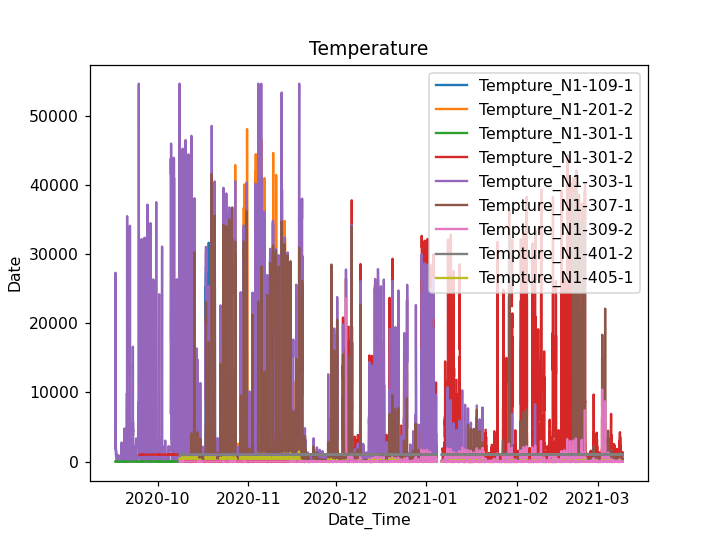

In [37]:
Light = Answer.loc[:,Title[11:20]]
plt.plot(pdates,Light)
plt.legend(Title[11:20])
plt.xlabel('Date_Time')
plt.ylabel('Date')
plt.title('Light')
plt.show()

In [38]:
Pressure = Answer.loc[:,Title[21:30]]
Pressure = Pressure[Pressure>800]
plt.plot(pdates,Pressure)
plt.legend(Title[21:30])
plt.xlabel('Date_Time')
plt.ylabel('Date')
plt.title('Pressure')
plt.show()

In [39]:
Temperature = Answer.loc[:,Title[31:40]]
Temperature = Temperature[Temperature <= 40]
plt.plot(pdates,Temperature)
plt.legend(Title[31:40])
plt.xlabel('Date_Time')
plt.ylabel('Date')
plt.title('Temperature')
plt.show()